Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\Users\SATHVIK\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
C:\Users\SATHVIK\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -786     |
| time/              |          |
|    fps             | 501      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 194        |
|    ep_rew_mean          | -693       |
| time/                   |            |
|    fps                  | 340        |
|    iterations           | 2          |
|    time_elapsed         | 12         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01651857 |
|    clip_fraction        | 0.136      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.78      |
|    explained_variance   | -0.000684  |
|    learning_rate        | 0.001      |
|   

C:\Users\SATHVIK\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
C:\Users\SATHVIK\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: -200.0 ± 0.0


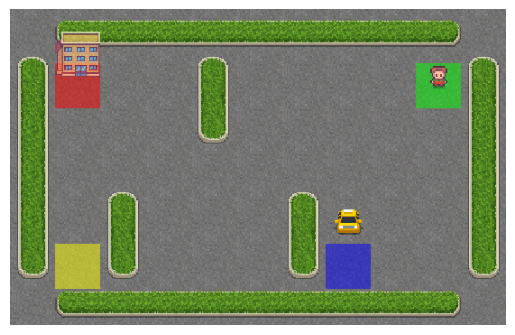

In [1]:
import gym
import numpy as np
import imageio
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

# 1. Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode="rgb_array")

# 2. Define and Train the PPO model
model = PPO("MlpPolicy", env, verbose=1, learning_rate=0.001, n_steps=2048, batch_size=64, n_epochs=10)
model.learn(total_timesteps=100_000)  # Train the model

# 3. Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward} ± {std_reward}")

# 4. Save the trained model
model.save("ppo_taxi")

# 5. Load the trained model (optional)
model = PPO.load("ppo_taxi")


# 8. Display the last frame of the navigation
last_frame = env.render()
plt.imshow(last_frame)
plt.axis("off")
plt.show()


In [2]:
import gym
import numpy as np
import imageio
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

#  Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Print environment details
print("State space:", env.observation_space)
print("Action space:", env.action_space)

# Define and Train the PPO model
model = PPO(
    "MlpPolicy", env, verbose=1, learning_rate=0.001, 
    n_steps=2048, batch_size=64, n_epochs=10
)
print("\nTraining PPO model...\n")
model.learn(total_timesteps=100_000)  # Train the agent

#  Save the trained model
model.save("ppo_taxi")
print("Model saved as 'ppo_taxi'.")

#  Load the trained model (optional)
model = PPO.load("ppo_taxi")

#  Evaluate the trained agent
print("\nEvaluating PPO agent...\n")
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean Reward: {mean_reward} ± {std_reward}")

# Test the trained agent
def test_agent(env, model, num_episodes=5):
    """Runs the trained PPO model on the environment for testing."""
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action, _ = model.predict(state)  # Model selects action
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
        
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Run tests
test_agent(env, model, num_episodes=5)

# Display the last frame of the navigation
last_frame = env.render()
plt.imshow(last_frame)
plt.axis("off")
plt.show()


State space: Discrete(500)
Action space: Discrete(6)
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

Training PPO model...

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 190      |
|    ep_rew_mean     | -714     |
| time/              |          |
|    fps             | 424      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 187       |
|    ep_rew_mean          | -670      |
| time/                   |           |
|    fps                  | 285       |
|    iterations           | 2         |
|    time_elapsed         | 14        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0129028 |
|    clip_fraction        | 0.125     |
|    clip

TypeError: unhashable type: 'numpy.ndarray'

Evaluation over 20 episodes:
Mean Reward: -200.45
Std Deviation: 1.96
Min Reward: -209
Max Reward: -200


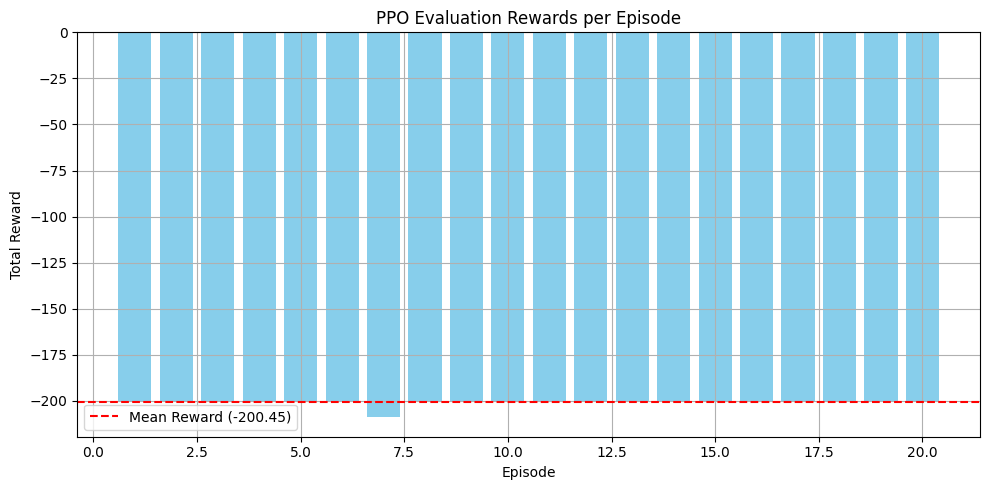

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

# Load environment and model
env = gym.make("Taxi-v3", render_mode="rgb_array")
model = PPO.load("ppo_taxi")

# Evaluate the model over multiple episodes
n_eval_episodes = 20
episode_rewards = []

for _ in range(n_eval_episodes):
    # Handle different gym versions that return (obs, info) or just obs
    reset_result = env.reset()
    if isinstance(reset_result, tuple):
        state, _ = reset_result
    else:
        state = reset_result
        
    done = False
    total_reward = 0

    while not done:
        action, _ = model.predict(state)
        # Ensure action is an integer for a discrete environment
        if isinstance(action, np.ndarray):
            action = int(action[0]) if action.ndim > 0 else int(action)
        
        # Gym step API can vary; handle both 4- and 5-element returns
        step_result = env.step(action)
        if len(step_result) == 5:
            state, reward, done, truncated, info = step_result
            done = done or truncated
        else:
            state, reward, done, info = step_result
            
        total_reward += reward

    episode_rewards.append(total_reward)

# Calculate metrics
mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)
min_reward = np.min(episode_rewards)
max_reward = np.max(episode_rewards)

# Print metrics
print(f"Evaluation over {n_eval_episodes} episodes:")
print(f"Mean Reward: {mean_reward:.2f}")
print(f"Std Deviation: {std_reward:.2f}")
print(f"Min Reward: {min_reward}")
print(f"Max Reward: {max_reward}")

# Plot the rewards for each episode
plt.figure(figsize=(10, 5))
plt.bar(range(1, n_eval_episodes + 1), episode_rewards, color="skyblue")
plt.axhline(mean_reward, color="red", linestyle="--", label=f"Mean Reward ({mean_reward:.2f})")
plt.title("PPO Evaluation Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import gym

# Initialize environment (with render_mode for visualization if needed)
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Load the trained model
model = PPO.load("ppo_taxi")

# Evaluate the trained model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

# Print evaluation metrics
print(f"Mean Reward over 10 episodes: {mean_reward:.2f} ± {std_reward:.2f}")


Mean Reward over 10 episodes: -200.00 ± 0.00
